In [10]:
!pip install transformers

In [10]:
!pip install osmnx as ox

  Using cached osmnx-1.9.4-py3-none-any.whl (107 kB)
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [11]:
!pip install contextily 

In [12]:
import pandas as pd
import networkx as nx # need networkx >= 2.5
#import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import xyzservices.providers as xyz
import re

In [1]:
#!wget -O train_images.zip "https://d307kc0mrhucc3.cloudfront.net/train_images.zip?Expires=1722392925&Signature=Kwhw-DEDHUBqvcdSniUPAVjo9E6c2ZyW2kk4FW-rP4boqDM8B1ZwwGuWB~-jmHMuV48Yrs5be0eL0yAqwPUgqoA0y6mh1GsJUHIPmq87gwWVBFm~t~0hR3qyO-iulHD63HlIo58aoE35Q0Q6-zDWL9x3lRlKYGNCVddgDUMpjp9fWW1qdxrbmMytMFCMcLbRCF-kzPdWSYQ3IvqhVuoI2Qxof~vnAZMVb-oWWkbK66NcOO8O4RrVdItWXZqUzW3-J6FLvmVwhb3ZUmAdWr9w9HRrUGYNyWGtnQWnLP3q0TFl0CosYwucS7Zu0UtzDYXxE3fLVQuEsV2ztuJtiYjeUQ__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ"

--2024-07-30 20:29:56--  https://d307kc0mrhucc3.cloudfront.net/train_images.zip?Expires=1722392925&Signature=Kwhw-DEDHUBqvcdSniUPAVjo9E6c2ZyW2kk4FW-rP4boqDM8B1ZwwGuWB~-jmHMuV48Yrs5be0eL0yAqwPUgqoA0y6mh1GsJUHIPmq87gwWVBFm~t~0hR3qyO-iulHD63HlIo58aoE35Q0Q6-zDWL9x3lRlKYGNCVddgDUMpjp9fWW1qdxrbmMytMFCMcLbRCF-kzPdWSYQ3IvqhVuoI2Qxof~vnAZMVb-oWWkbK66NcOO8O4RrVdItWXZqUzW3-J6FLvmVwhb3ZUmAdWr9w9HRrUGYNyWGtnQWnLP3q0TFl0CosYwucS7Zu0UtzDYXxE3fLVQuEsV2ztuJtiYjeUQ__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ
Resolving d307kc0mrhucc3.cloudfront.net (d307kc0mrhucc3.cloudfront.net)... 99.84.71.117, 99.84.71.3, 99.84.71.135, ...
Connecting to d307kc0mrhucc3.cloudfront.net (d307kc0mrhucc3.cloudfront.net)|99.84.71.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15413106541 (14G) [application/zip]
Saving to: ‘train_images.zip’

train_images.zip    100%[===================>]  14.35G   250MB/s    in 52s     

2024-07-30 20:30:48 (284 MB/s) - ‘train_images.zip’ saved [15413106541/15413106541]

In [2]:
#!unzip train_images.zip -d train_images


Archive:  train_images.zip
warning [train_images.zip]:  12884901888 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  12884901888
  (attempting to re-compensate)
error: invalid zip file with overlapped components (possible zip bomb)


In [5]:
#!wget -O train_labels.zip "https://d307kc0mrhucc3.cloudfront.net/train_labels.zip?Expires=1722391132&Signature=hRs-hgUhPjZgJR-H5giJhT~SIgYD013jmnNP9RiYx33-zwT0raIm~s098Jvq7jGDv4Sgr0OERy~w79sI3zPE4aHjt2TvsMVbZGlZ2s5ZBgvRF17~h1WHNJwgjnfruOJheNMpCTVp61PYiPtQ2WdcjdSnEn-xGjsjbNwtDK4Qf75HjSIKDjRUZDd3m4t64oA0NC7X9N2LIlDC5dAQY3TzkWhQUE~fLqW2mHB5Qc0kBaWkl5jIiMvD-847Wvh8xro-4ZN4lH~IplfTEmketU87OkItvARyiA0GR4KzpCJNbVHVfijyxa3ICqWs6Y25ac4pgFPScBtsztLEI~nb59WIdg__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ"

--2024-07-30 20:24:04--  https://d307kc0mrhucc3.cloudfront.net/train_labels.zip?Expires=1722391132&Signature=hRs-hgUhPjZgJR-H5giJhT~SIgYD013jmnNP9RiYx33-zwT0raIm~s098Jvq7jGDv4Sgr0OERy~w79sI3zPE4aHjt2TvsMVbZGlZ2s5ZBgvRF17~h1WHNJwgjnfruOJheNMpCTVp61PYiPtQ2WdcjdSnEn-xGjsjbNwtDK4Qf75HjSIKDjRUZDd3m4t64oA0NC7X9N2LIlDC5dAQY3TzkWhQUE~fLqW2mHB5Qc0kBaWkl5jIiMvD-847Wvh8xro-4ZN4lH~IplfTEmketU87OkItvARyiA0GR4KzpCJNbVHVfijyxa3ICqWs6Y25ac4pgFPScBtsztLEI~nb59WIdg__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ
Resolving d307kc0mrhucc3.cloudfront.net (d307kc0mrhucc3.cloudfront.net)... 99.84.71.3, 99.84.71.135, 99.84.71.117, ...
Connecting to d307kc0mrhucc3.cloudfront.net (d307kc0mrhucc3.cloudfront.net)|99.84.71.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48950383 (47M) [application/zip]
Saving to: ‘train_labels.zip’

train_labels.zip    100%[===================>]  46.68M   149MB/s    in 0.3s    

2024-07-30 20:24:05 (149 MB/s) - ‘train_labels.zip’ saved [48950383/48950383]



In [6]:
#!unzip train_labels.zip -d train_labels

Archive:  train_labels.zip
  inflating: train_labels/xView_train.geojson  


In [ ]:
images_gdf = gpd.read_file('https://d307kc0mrhucc3.cloudfront.net/train_images.zip?Expires=1722391132&Signature=gRTTeBt~o9qHwVbkJ3mfEoTSTTj9j0uJ3V61tkNsIW0Ymibghr4WL6TSCU~H7kl1VGU3Xs95Sdq-H0JyLnkHz1wIayvM3xcwD3bbHRXsvym20c8FeovLPulKz2eb1rlxDJLkXebOEzib2M7orgGr9Xw9sB5UL--Gtp6QCTlpdDQJwIxCskB6pQ4AInDM5X5CQJcHUSawweuMaBpfBJqJarsJt2oyQvoGEOzTe-7NiA2KADUf67h2~x~2AsyRDfxkaWWJWQaOGVCvvAu0p3AQ6y2-15~sqZ9T5K5FA53q3WmWxRMUETRgbnhIf9PGJMtWUvKxDmxvOIXTV6K4YfZ7lg__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [8]:
!wget -O train_labels.zip "https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar"

--2024-07-30 20:35:59--  https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 44.225.27.40, 100.20.197.162, 52.41.224.48, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|44.225.27.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8381754539 (7.8G) [application/x-tar]
Saving to: ‘train_labels.zip’

train_labels.zip    100%[===================>]   7.81G  27.2MB/s    in 4m 19s  

2024-07-30 20:40:17 (30.9 MB/s) - ‘train_labels.zip’ saved [8381754539/8381754539]



In [7]:
images_train = gpd.read_file('https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


DriverError: '/vsicurl/https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar' not recognized as a supported file format.

In [9]:
#!wget -O train_images_labels_targets.tar https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar

--2024-07-30 20:43:21--  https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 35.163.206.1, 34.209.216.251, 44.229.88.14, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|35.163.206.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8381754539 (7.8G) [application/x-tar]
Saving to: ‘train_images_labels_targets.tar’

train_images_labels 100%[===================>]   7.81G   101MB/s    in 3m 19s  

2024-07-30 20:46:40 (40.2 MB/s) - ‘train_images_labels_targets.tar’ saved [8381754539/8381754539]



In [10]:
#!wget -O test_images_labels_targets.tar https://files.bwsi-remote-sensing.net/data/xview/test_images_labels_targets.tar

--2024-07-30 20:46:40--  https://files.bwsi-remote-sensing.net/data/xview/test_images_labels_targets.tar
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 34.215.57.177, 34.209.216.251, 44.229.88.14, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|34.215.57.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2786922308 (2.6G) [application/x-tar]
Saving to: ‘test_images_labels_targets.tar’

test_images_labels_ 100%[===================>]   2.59G   117MB/s    in 25s     

2024-07-30 20:47:05 (106 MB/s) - ‘test_images_labels_targets.tar’ saved [2786922308/2786922308]



In [11]:
import tarfile
import os

# Function to extract a tar file
def extract_tar_file(tar_path, extract_path):
    with tarfile.open(tar_path, 'r') as tar_ref:
        tar_ref.extractall(extract_path)
        print(f"Extraction of {tar_path} completed.")

# Define the paths
train_tar_path = 'train_images_labels_targets.tar'
test_tar_path = 'test_images_labels_targets.tar'
train_extract_path = 'train_images_labels_targets'
test_extract_path = 'test_images_labels_targets'

# Extract the tar files
extract_tar_file(train_tar_path, train_extract_path)
extract_tar_file(test_tar_path, test_extract_path)

Extraction of train_images_labels_targets.tar completed.
Extraction of test_images_labels_targets.tar completed.


In [13]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

In [14]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from tqdm.notebook import tqdm
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the paths to the test data
test_image_dir = 'train_images_labels_targets/train/images'
test_label_dir = 'train_images_labels_targets/train/labels'
target_dir = 'train_images_labels_targets/train/targets'

# Ensure the directories exist
print(f"Test Image directory: {test_image_dir}")
print(f"Test Label directory: {test_label_dir}")
print(f"Target directory: {target_dir}")

# Function to get file paths
def get_file_paths(directory, extensions):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")
    return [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith(extensions)]

# Load the test image paths
test_image_paths = get_file_paths(test_image_dir, ('.png', '.jpg', '.jpeg'))

# Load the target paths
target_paths = get_file_paths(target_dir, ('.png', '.jpg', '.jpeg'))

# Define a custom dataset class for the test images
class TestDataset(Dataset):
    def __init__(self, image_paths, target_paths, transform=None):
        self.image_paths = image_paths
        self.target_paths = target_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        target_path = self.target_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, target_path, image_path
    

Test Image directory: train_images_labels_targets/train/images
Test Label directory: train_images_labels_targets/train/labels
Target directory: train_images_labels_targets/train/targets


In [15]:
# Load the feature extractor and model
feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")
model.eval()  # Set model to evaluation mode

# Prepare the dataset and dataloader
def transform(image):
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs["pixel_values"].squeeze(0)

dataset = TestDataset(test_image_paths, target_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=False)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize an empty list to store the results
results = []

# Initialize the progress bar
progress_bar = tqdm(dataloader, desc="Running Inference", unit="batch")

# Iterate over the dataloader with the progress bar
for batch in progress_bar:
    inputs, target_paths, image_paths = batch
    inputs = inputs.to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).cpu().tolist()
    results.extend(zip(image_paths, target_paths, predicted_class_idx))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["image_path", "target_path", "predicted_class"])

# Save the results to a CSV file
results_df.to_csv("inference_results.csv", index=False)
print("Inference results saved to inference_results.csv")

# Display the first few rows of inference results
print("Inference Results:")
print(results_df.head())

2024-08-01 14:08:15.214749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 14:08:15.493454: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 14:08:15.640754: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 14:08:16.689394: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Running Inference:   0%|          | 0/297 [00:00<?, ?batch/s]

Inference results saved to inference_results.csv
Inference Results:
                                          image_path   
0  train_images_labels_targets/train/images/socal...  \
1  train_images_labels_targets/train/images/socal...   
2  train_images_labels_targets/train/images/socal...   
3  train_images_labels_targets/train/images/socal...   
4  train_images_labels_targets/train/images/socal...   

                                         target_path  predicted_class  
0  train_images_labels_targets/train/targets/sant...                0  
1  train_images_labels_targets/train/targets/soca...                0  
2  train_images_labels_targets/train/targets/hurr...                0  
3  train_images_labels_targets/train/targets/hurr...                0  
4  train_images_labels_targets/train/targets/palu...                0  


Accuracy: 0.51


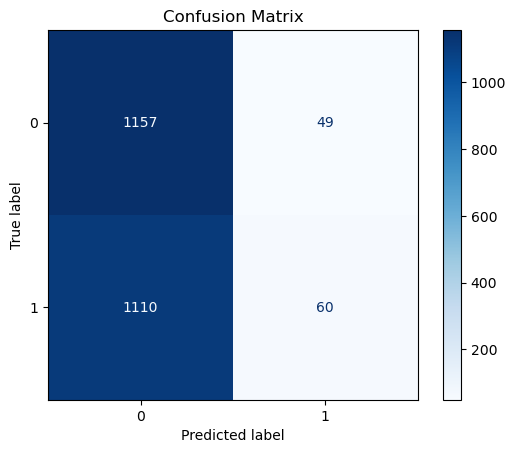

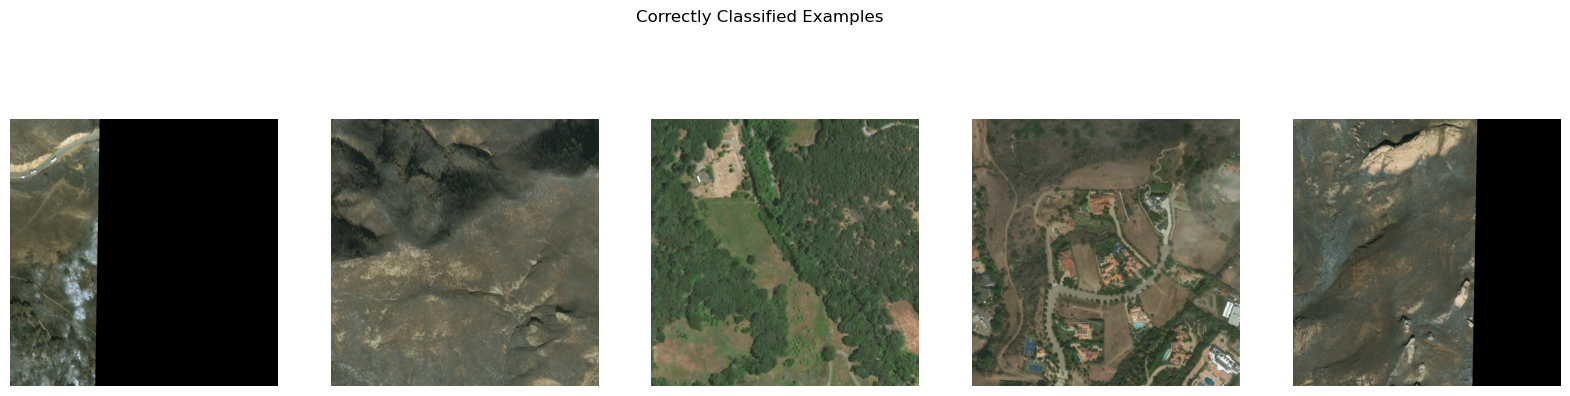

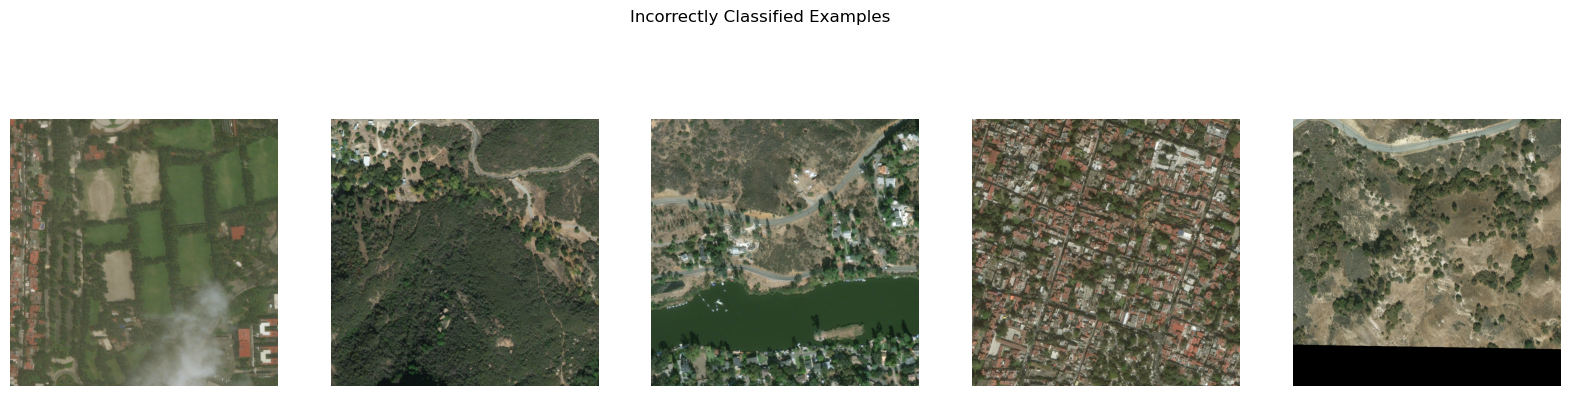

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.96      0.67      1206
           1       0.55      0.05      0.09      1170

    accuracy                           0.51      2376
   macro avg       0.53      0.51      0.38      2376
weighted avg       0.53      0.51      0.38      2376



In [16]:
# Assuming we have a function to get true labels from the target images
def get_true_labels(target_paths):
    # This function needs to be implemented to read the true labels from the target images
    # For now, we will use dummy data
    true_labels = [0 if "pre" in path else 1 for path in target_paths]
    return true_labels

# Add true labels to the results DataFrame
results_df["true_class"] = get_true_labels(results_df["target_path"])

# Compute accuracy
accuracy = (results_df['predicted_class'] == results_df['true_class']).mean()
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Function to display images
def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, image_path in zip(axes, image_paths):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Display correctly classified examples
correct_preds = results_df[results_df['predicted_class'] == results_df['true_class']]
if not correct_preds.empty:
    display_images(correct_preds['image_path'].sample(min(5, len(correct_preds))), "Correctly Classified Examples")
else:
    print("No correctly classified examples to display.")

# Display incorrectly classified examples
incorrect_preds = results_df[results_df['predicted_class'] != results_df['true_class']]
if not incorrect_preds.empty:
    display_images(incorrect_preds['image_path'].sample(min(5, len(incorrect_preds))), "Incorrectly Classified Examples")
else:
    print("No incorrectly classified examples to display.")

# Print classification report
print("Classification Report:")
print(classification_report(results_df['true_class'], results_df['predicted_class']))

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize an empty list to store the results
results = []

# Initialize the progress bar
progress_bar = tqdm(dataloader, desc="Running Inference", unit="batch")

# Iterate over the dataloader with the progress bar
for batch in progress_bar:
    inputs, labels, image_paths = batch
    inputs, labels = inputs.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).cpu().tolist()
    results.extend(zip(image_paths, labels.cpu().tolist(), predicted_class_idx))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["image_path", "true_class", "predicted_class"])

# Save the results to a CSV file
results_df.to_csv("inference_results.csv", index=False)
print("Inference results saved to inference_results.csv")

# Display the first few rows of inference results
print("Inference Results:")
print(results_df.head())

# Compute accuracy
accuracy = accuracy_score(results_df['true_class'], results_df['predicted_class'])
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Running Inference:   0%|          | 0/700 [00:00<?, ?batch/s]

AttributeError: 'tuple' object has no attribute 'to'

In [19]:
import torchvision
torch.backends.cudnn.benchmark = True # flag for some GPU optimizations
torch.hub.set_dir('pytorch-hub-cache') # set location for saving pretrained models
# net = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True) # load pretrained model
net = torchvision.models.get_model('resnet50')

# pretrained neural network is missing the last layer, we add it back on
net.fc = nn.Linear(2048, 3) # resnet50 create 2048 features in its first half, we have 3 classes
net = nn.DataParallel(net) # specify the data distribution strategy if we have more than one GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # send it to GPU if it's available
net.to(device) 
print("ResNet ready")

ResNet ready


In [18]:
!XVIEW3_DIR=xView3-The-First-Place-Solution sh scripts/v2s_unet_s2_full.sh

sh: 0: Can't open scripts/v2s_unet_s2_full.sh


In [18]:
import torch
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter

from PIL import Image
import datetime

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms, utils

import warnings
warnings.filterwarnings('ignore') # turn off warnings
# warnings.filterwarnings('default') # regular level warnings

In [20]:
torch.__version__

'1.13.1+cu116'

In [ ]:
classes = ['damage:flood/water','damage:rubble','damage:misc']
# Let's do a quick sanity check
damage_dataset = LadiDataset('damage_examples.csv', classes)

fig = plt.figure()

for i, sample in enumerate(damage_dataset):

    print(i, 
          sample['label'], 
          sample['image_name'])

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(sample['image'])

    if i == 5:
        plt.show()
        break

In [21]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/Model Runnin


In [28]:
import os
import shutil

source_dir = 'train_images_labels_targets/train/images/'
target_dir = 'train_images_labels_targets/hurricane_imgs'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over files in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file name starts with 'hurricane', 'midwest', or 'palu'
        if file.startswith('hurricane') or file.startswith('midwest') or file.startswith('palu'):
            file_path = os.path.join(root, file)
            
            # Move the file to the target directory
            shutil.move(file_path, os.path.join(target_dir, file))


In [38]:
source_dir = 'train_images_labels_targets/train/labels/'
target_dir = 'train_images_labels_targets/hurricane_labels'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over files in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file name starts with 'hurricane', 'midwest', or 'palu'
        if file.startswith('hurricane') or file.startswith('midwest') or file.startswith('palu'):
            file_path = os.path.join(root, file)
            
            # Move the file to the target directory
            shutil.move(file_path, os.path.join(target_dir, file))

In [30]:
import torch
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter

from PIL import Image
import datetime

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms, utils

import warnings
warnings.filterwarnings('ignore') # turn off warnings
# warnings.filterwarnings('default') # regular level warnings

In [39]:
import json

In [40]:
# Define the paths to the data
#updated to assign path to hurricanes ONLY, just for training (as of now)
train_image_dir = 'train_images_labels_targets/hurricane_imgs'
train_label_dir = 'train_images_labels_targets/hurricane_labels'
test_image_dir = 'test_images_labels_targets/test/images'
test_label_dir = 'test_images_labels_targets/test/labels'

# Ensure the directories exist
print(f"Train Image directory: {train_image_dir}")
print(f"Train Label directory: {train_label_dir}")
print(f"Test Image directory: {test_image_dir}")
print(f"Test Label directory: {test_label_dir}")

# Function to get file paths
def get_file_paths(directory, extensions):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")
    return [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith(extensions)]

# Load the image paths
train_image_paths = get_file_paths(train_image_dir, ('.png', '.jpg', '.jpeg'))
test_image_paths = get_file_paths(test_image_dir, ('.png', '.jpg', '.jpeg'))

# Load the labels from metadata
def load_labels(label_dir):
    labels = {}
    for fname in os.listdir(label_dir):
        if fname.endswith('.json'):
            with open(os.path.join(label_dir, fname), 'r') as f:
                data = json.load(f)
                img_name = data['metadata']['img_name']
                label = 1 if 'post_disaster' in img_name else 0
                labels[img_name] = label
    return labels

train_labels = load_labels(train_label_dir)
test_labels = load_labels(test_label_dir)

Train Image directory: train_images_labels_targets/hurricane_imgs
Train Label directory: train_images_labels_targets/hurricane_labels
Test Image directory: test_images_labels_targets/test/images
Test Label directory: test_images_labels_targets/test/labels


In [32]:
# Define a custom dataset class
train_labels = load_labels(train_label_dir)
test_labels = load_labels(test_label_dir)
class DisasterDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        img_name = os.path.basename(image_path)
        label = self.labels.get(img_name, 0)
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label, image_path

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and data loaders
train_dataset = DisasterDataset(train_image_paths, train_labels, transform)
test_dataset = DisasterDataset(test_image_paths, test_labels, transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

NameError: name 'json' is not defined

In [27]:
print(f"Source directory: {source_dir}")
print(f"Target directory: {target_dir}")

Source directory: Model Runnin/train_images_labels_targets/train/images/
Target directory: Model Runnin/train_images_labels_targets/hurricane_imgs


In [41]:
class DisasterDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.label_paths = {os.path.splitext(fname)[0]: os.path.join(label_dir, fname) for fname in os.listdir(label_dir) if fname.endswith('.json')}
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        image = Image.open(image_path).convert("RGB")
        
        label_path = self.label_paths.get(image_name, None)
        label = 0  # default label for pre-disaster
        if label_path:
            with open(label_path, 'r') as f:
                metadata = json.load(f)
                if 'post_disaster' in metadata.get('img_name', ''):
                    label = 1  # label for post-disaster
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Paths
train_image_dir = 'train_images_labels_targets/hurricane_imgs'
train_label_dir = 'train_images_labels_targets/hurricane_labels'
test_image_dir = 'test_images_labels_targets/test/images'
test_label_dir = 'test_images_labels_targets/test/labels'

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [42]:
# Datasets and Data Loaders
train_dataset = DisasterDataset(train_image_dir, train_label_dir, transform)
test_dataset = DisasterDataset(test_image_dir, test_label_dir, transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model Setup
net = torchvision.models.resnet50(pretrained=True)
net.fc = nn.Linear(2048, 2)
net = nn.DataParallel(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

In [36]:
import json


In [43]:
for i, sample in enumerate(train_dataset):

    print(i, 
          sample['label'], 
          sample['image_name'])

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(sample['image'])

    if i == 5:
        plt.show()
        break

TypeError: tuple indices must be integers or slices, not str

In [44]:
for i, sample in enumerate(train_dataset):
    # Assuming sample is a tuple like (image, label, image_name)
    image, label, image_name = sample
    print(i, label, image_name)

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(image)

    if i == 5:
        plt.show()
        break


ValueError: not enough values to unpack (expected 3, got 2)

In [46]:
def show_image(image):
    plt.imshow(image)
    # pause a bit so that plots are updated
    plt.pause(0.01)

In [48]:
def show_image_pil(image_tensor):
    # Convert (C, H, W) to (H, W, C)
    image = image_tensor.transpose(1, 2, 0).numpy()
    image = Image.fromarray(np.uint8(image * 255))  # Convert to PIL image
    image.show()

In [49]:
for i, sample in enumerate(train_dataset):
    if isinstance(sample, dict):
        print(i, 
              sample.get('label'), 
              sample.get('image_name'))
        show_image_pil(sample.get('image'))
    elif isinstance(sample, tuple):
        if len(sample) == 2:
            image, label = sample
            print(i, label)
            show_image_pil(image)
        else:
            print(f"Unexpected tuple length: {len(sample)}")
    else:
        print(f"Unhandled type: {type(sample)}")

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))

    if i == 5:
        plt.show()
        break


0 0


TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [50]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def show_image(image_tensor):
    # Convert (C, H, W) to (H, W, C)
    if isinstance(image_tensor, torch.Tensor):
        image = image_tensor.permute(1, 2, 0).cpu().numpy()  # (C, H, W) -> (H, W, C)
    else:
        raise TypeError("Expected image_tensor to be a PyTorch tensor")
    
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
for i, sample in enumerate(train_dataset):
    image_tensor = sample['image']  # Assuming this is a PyTorch tensor with shape (3, 224, 224)
    label = sample['label']
    image_name = sample['image_name']

    print(i, label, image_name)

    plt.tight_layout()
    plt.title(f'Sample #{i}')
    show_image(image_tensor)

    if i == 5:
        break


TypeError: tuple indices must be integers or slices, not str

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


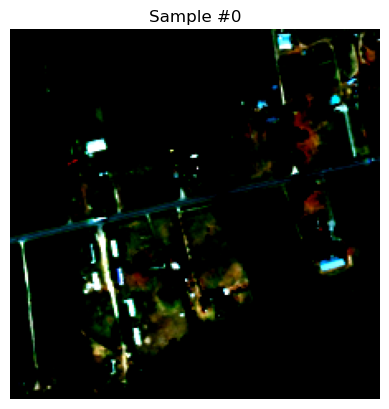

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


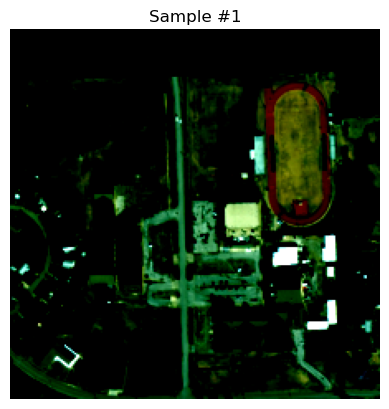

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


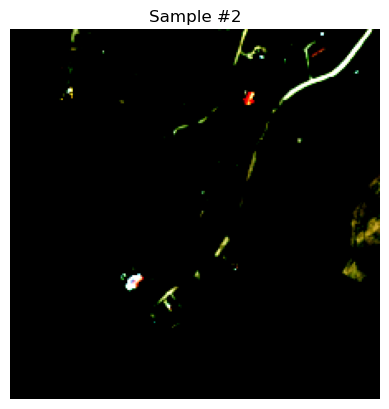

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


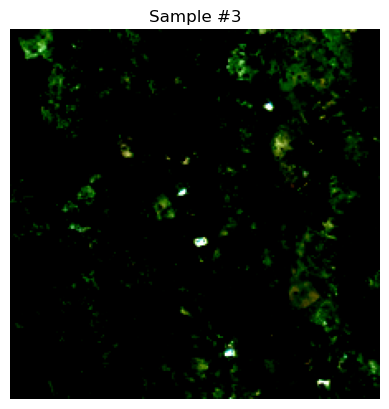

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


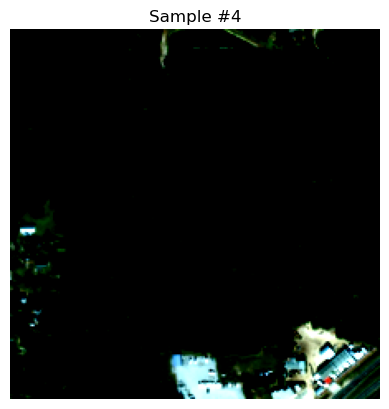

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


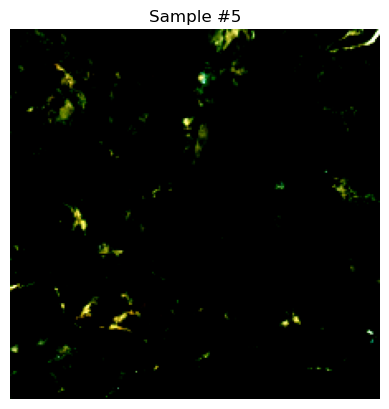

In [52]:
for i, sample in enumerate(train_dataset):
    if isinstance(sample, dict):
        # Access dictionary elements
        image_tensor = sample['image']
        label = sample['label']
        image_name = sample['image_name']
    elif isinstance(sample, tuple):
        # Access tuple elements
        image_tensor = sample[0]
        label = sample[1]
        image_name = sample[1]
    else:
        raise TypeError(f"Unhandled type: {type(sample)}")

    # Convert (C, H, W) to (H, W, C) for display
    image = image_tensor.permute(1, 2, 0).cpu().numpy()

    plt.tight_layout()
    plt.title(f'Sample #{i}')
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

    if i == 5:
        break


In [1]:
def get_train_test_loaders(dataset, test_split_ratio=0.2, batch_size=4, shuffle_dataset=True, random_seed=0, num_workers=1):

    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(test_split_ratio * dataset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, test_indices = indices[split:], indices[:split]

    # Creating data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                               sampler=train_sampler, num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                               sampler=test_sampler, num_workers=num_workers)
    return train_loader, test_loader

In [2]:
damage_train_loader, damage_test_loader = get_train_test_loaders(train_dataset, batch_size=4, random_seed=42, num_workers=4) #batch size should be powers of 2

NameError: name 'train_dataset' is not defined

In [3]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

NameError: name 'optim' is not defined

In [4]:
def train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, logs_path, model_name, 
                starting_epoch=0, additional_epochs=2, print_every_num_batches=100):
    model_name_base = f'resnet50-{model_name}'+'.ep{}.pth'
    writer = SummaryWriter(logs_path)
    checkpoints_path = logs_path/'checkpoints'
    checkpoints_path.mkdir(parents=True, exist_ok=True)
    if starting_epoch > 0:
        starting_epoch_string = str(starting_epoch).zfill(3)
        model_load_path = checkpoints_path/model_name_base.format(starting_epoch_string)
        net.load_state_dict(torch.load(model_load_path))
    for epoch in range(starting_epoch, starting_epoch+additional_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_epoch_loss = 0.0
        for i, data in enumerate(damage_train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['image'].to(device)
            labels = data['label'].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            running_epoch_loss += loss.item()
            if (i+1) % print_every_num_batches == 0:    # print every 10 mini-batches
                print(f'[epoch {epoch+1}, batch {i +1} ] average loss: {running_loss/print_every_num_batches}')
                running_loss = 0.0

        average_epoch_loss = running_epoch_loss/(i+1)
        writer.add_scalar('Loss/epoch_avg/train', average_epoch_loss, epoch)
        print(f'[epoch {epoch+1}] average training epoch loss: {average_epoch_loss}')
        writer.add_scalar('LR/rate', scheduler.get_last_lr()[0], epoch)
        scheduler.step()
        running_epoch_loss = 0.0
        print("Getting epoch test loss...")
        for i, data in enumerate(test_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['image'].to(device)
            labels = data['label'].to(device)

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_epoch_loss += loss.item()

        average_epoch_loss = running_epoch_loss/(i+1)
        writer.add_scalar('Loss/epoch_avg/test', average_epoch_loss, epoch)
        print(f'[epoch {epoch+1}] average test epoch loss: {average_epoch_loss}')
        epoch_string = str(epoch+1).zfill(3)
        model_save_path = checkpoints_path/model_name_base.format(epoch_string)
        torch.save(net.state_dict(), model_save_path)

    print('Finished Training')
    writer.close()

In [5]:
for i, data in enumerate(damage_train_loader, 0):
    # get the inputs; data is a tuple of (inputs, labels)
    inputs = data[0].to(device)  # Assuming the first element is 'image'
    labels = data[1].to(device)  # Assuming the second element is 'label'

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    running_epoch_loss += loss.item()
    if (i+1) % print_every_num_batches == 0:    # print every print_every_num_batches mini-batches
        print(f'[epoch {epoch+1}, batch {i + 1} ] average loss: {running_loss/print_every_num_batches}')
        running_loss = 0.0


NameError: name 'damage_train_loader' is not defined

In [6]:
def train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, logs_path, model_name, 
                starting_epoch=0, additional_epochs=2, print_every_num_batches=100):
    model_name_base = f'resnet50-{model_name}' + '.ep{}.pth'
    writer = SummaryWriter(logs_path)
    checkpoints_path = logs_path / 'checkpoints'
    checkpoints_path.mkdir(parents=True, exist_ok=True)
    
    if starting_epoch > 0:
        starting_epoch_string = str(starting_epoch).zfill(3)
        model_load_path = checkpoints_path / model_name_base.format(starting_epoch_string)
        net.load_state_dict(torch.load(model_load_path))
    
    for epoch in range(starting_epoch, starting_epoch + additional_epochs):  # loop over the dataset multiple times
        running_loss = 0.0  # Initialize running_loss for the epoch
        running_epoch_loss = 0.0  # Initialize running_epoch_loss for the epoch
        
        for i, data in enumerate(damage_train_loader, 0):
            # Get the inputs; data is a tuple of (inputs, labels)
            inputs = data[0].to(device)  # Assuming the first element is 'image'
            labels = data[1].to(device)  # Assuming the second element is 'label'

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            running_epoch_loss += loss.item()
            if (i + 1) % print_every_num_batches == 0:  # Print every print_every_num_batches mini-batches
                print(f'[epoch {epoch + 1}, batch {i + 1}] average loss: {running_loss / print_every_num_batches}')
                running_loss = 0.0  # Reset running_loss for the next set of batches

        average_epoch_loss = running_epoch_loss / (i + 1)
        writer.add_scalar('Loss/epoch_avg/train', average_epoch_loss, epoch)
        print(f'[epoch {epoch + 1}] average training epoch loss: {average_epoch_loss}')
        writer.add_scalar('LR/rate', scheduler.get_last_lr()[0], epoch)
        scheduler.step()

        # Test loss calculation and saving the model can follow here

    print('Finished Training')
    writer.close()


In [60]:
outputs = pathlib.Path('outputs2')
outputs.mkdir(exist_ok=True, parents=True)

model_name = 'damage_model'

# train damage model
train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, outputs, model_name, 
                starting_epoch=0, additional_epochs=1, print_every_num_batches=100)

[epoch 1, batch 100] average loss: 8.940696005765858e-10
[epoch 1, batch 200] average loss: 0.0
[epoch 1, batch 300] average loss: 0.0
[epoch 1, batch 400] average loss: 0.0
[epoch 1, batch 500] average loss: 0.0
[epoch 1, batch 600] average loss: 0.0
[epoch 1] average training epoch loss: 1.3861544194985825e-10
Finished Training


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        """
        Args:
            image_dir (str): Directory with all the images.
            label_file (str): Path to the file with labels.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.image_dir = image_dir
        self.labels = self.load_labels(label_file)
        self.transform = transform

    def load_labels(self, label_file):
        # Assuming label_file is a CSV with two columns: filename, label
        labels = {}
        with open(label_file, 'r') as f:
            for line in f:
                image_name, label = line.strip().split(',')
                labels[image_name] = int(label)  # Assuming labels are integers
        return labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_name = list(self.labels.keys())[idx]
        img_path = os.path.join(self.image_dir, image_name)
        image = Image.open(img_path).convert("RGB")
        label = self.labels[image_name]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage
image_dir = 'path/to/images'
label_file = 'path/to/labels.csv'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

dataset = CustomImageDataset(image_dir=test_image_dir, label_file=test_label_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [63]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Root directory path with subdirectories for each label.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = self.create_label_map()

    def create_label_map(self):
        # Create a mapping from label names to numerical labels
        label_map = {}
        for idx, label_name in enumerate(os.listdir(self.root_dir)):
            label_map[label_name] = idx
        return label_map

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

    def load_images(self):
        # Populate self.image_paths and self.labels based on directory structure
        for label_name, label in self.label_map.items():
            label_dir = os.path.join(self.root_dir, label_name)
            if not os.path.isdir(label_dir):
                continue
            for filename in os.listdir(label_dir):
                if filename.endswith(('jpg', 'png', 'jpeg')):  # Add more extensions if needed
                    file_path = os.path.join(label_dir, filename)
                    self.image_paths.append(file_path)
                    self.labels.append(label)

# Example usage
root_dir = 'test_images_labels_targets/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

dataset = CustomImageDataset(root_dir=root_dir, transform=transform)
dataset.load_images()  # Populate the dataset with image paths and labels
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for images, labels in dataloader:
    # Use the images and labels for training
    images = images.cuda()  # Move to GPU if available
    labels = labels.cuda()

In [68]:
correct = 0
total = 0
with torch.no_grad():
    for data in damage_test_loader:
        images = data['image'].cuda()
        labels = data['label'][:,0].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

TypeError: list indices must be integers or slices, not str

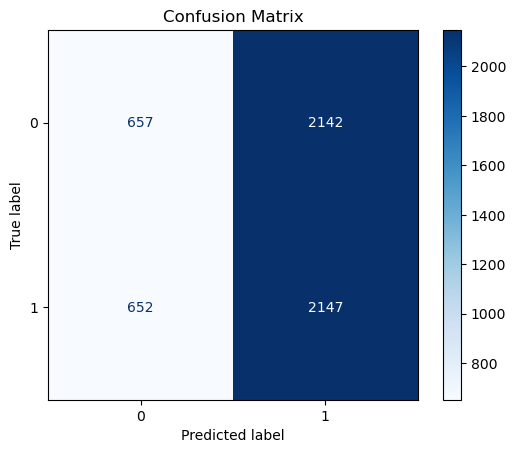

FileNotFoundError: [Errno 2] No such file or directory: 'train_images_labels_targets/train/images/hurricane-florence_00000278_pre_disaster.png'

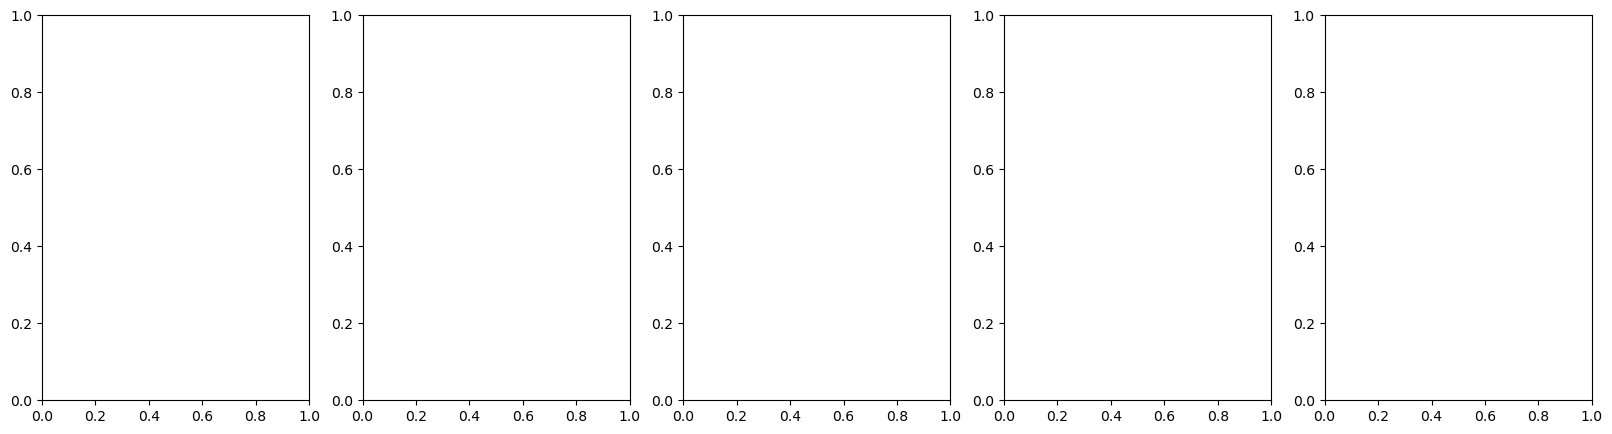

In [67]:
def get_true_labels(target_paths):
    # This function needs to be implemented to read the true labels from the target images
    # For now, we will use dummy data
    true_labels = [0 if "pre" in path else 1 for path in target_paths]
    return true_labels

# Add true labels to the results DataFrame
results_df["true_class"] = get_true_labels(results_df["target_path"])


cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Function to display images
def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, image_path in zip(axes, image_paths):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Display correctly classified examples
correct_preds = results_df[results_df['predicted_class'] == results_df['true_class']]
if not correct_preds.empty:
    display_images(correct_preds['image_path'].sample(min(5, len(correct_preds))), "Correctly Classified Examples")
else:
    print("No correctly classified examples to display.")

# Display incorrectly classified examples
incorrect_preds = results_df[results_df['predicted_class'] != results_df['true_class']]
if not incorrect_preds.empty:
    display_images(incorrect_preds['image_path'].sample(min(5, len(incorrect_preds))), "Incorrectly Classified Examples")
else:
    print("No incorrectly classified examples to display.")

# Print classification report
print("Classification Report:")
print(classification_report(results_df['true_class'], results_df['predicted_class']))

In [66]:
for data in damage_test_loader:
    images = data[0].cuda()  # First element of the list
    labels = data[1].cuda()  # Second element of the list
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 100 %


In [73]:
for data in test_loader:
    print(type(data))

    print(data)
    break


<class 'list'>
[tensor([[[[-0.3198, -0.1486, -0.1314,  ..., -1.0562, -1.0904, -1.0733],
          [-0.4739, -0.2342, -0.1314,  ..., -1.0904, -1.0733, -1.0219],
          [-0.6281, -0.3027, -0.2513,  ..., -1.0390, -1.0733, -1.0048],
          ...,
          [-0.9192, -1.0219, -1.2959,  ..., -1.0390, -0.9192, -0.9020],
          [-0.4739, -0.8849, -1.1760,  ..., -1.0048, -0.9363, -0.9705],
          [-0.0972, -0.7822, -1.1418,  ..., -0.9192, -1.0048, -1.0048]],

         [[-0.0399, -0.0399, -0.0749,  ..., -0.5476, -0.6001, -0.5476],
          [-0.0574, -0.0224, -0.0399,  ..., -0.6176, -0.6176, -0.5126],
          [-0.1975, -0.0224, -0.0224,  ..., -0.5651, -0.6176, -0.5301],
          ...,
          [-0.6176, -0.7052, -1.0028,  ..., -0.6352, -0.4601, -0.4076],
          [-0.3200, -0.6527, -0.8452,  ..., -0.5301, -0.4251, -0.4776],
          [ 0.0126, -0.5301, -0.7927,  ..., -0.4426, -0.4776, -0.4776]],

         [[-0.4275, -0.4275, -0.4275,  ..., -0.7936, -0.7761, -0.7761],
          [-0.

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

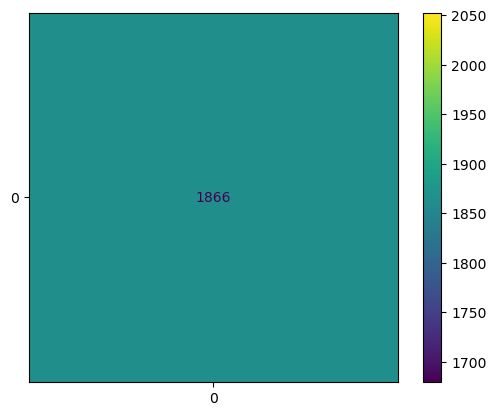

In [74]:
truth_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data  # Unpack the list into images and labels
        images = images.cuda()
        labels = labels[:, 0].cuda() if labels.ndim > 1 else labels.cuda()  # Handle labels appropriately
        
        # Forward pass
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # Collect true and predicted labels
        truth_labels.append(labels.cpu())
        predicted_labels.append(predicted.cpu())

# Convert lists to numpy arrays
truth_labels = np.concatenate([x.numpy() for x in truth_labels])
predicted_labels = np.concatenate([x.numpy() for x in predicted_labels])

# Optionally adjust labels if necessary
predicted_labels[predicted_labels == 2] = 0

# Calculate confusion matrix
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['flood', 'no flood'])
disp.plot()
plt.show()


In [8]:
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

# Assuming truth_labels and predicted_labels have already been collected

# Calculate confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Ensure that confusion matrix and labels are correctly aligned
print(f'Confusion Matrix:\n{confusion_matrix}')

# Number of classes (should match the number of labels)
num_classes = confusion_matrix.shape[0]

# Define class names corresponding to your problem
class_names = ['flood', 'no flood']

# Ensure the number of class names matches the number of classes in the confusion matrix
assert len(class_names) == num_classes, "Number of class names does not match the number of classes in the confusion matrix."

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


NameError: name 'truth_labels' is not defined

In [7]:
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

# Assuming truth_labels and predicted_labels have already been collected

# Calculate confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Print the confusion matrix and its shape
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Confusion Matrix Shape: {confusion_matrix.shape}')

# Determine the number of classes from the confusion matrix
num_classes = confusion_matrix.shape[0]

# Define class names corresponding to your problem
# Ensure this list matches the number of classes in the confusion matrix
class_names = ['flood', 'no flood']

# Check if the number of class names matches the number of classes in the confusion matrix
if len(class_names) != num_classes:
    print(f'Warning: Number of class names ({len(class_names)}) does not match the number of classes in the confusion matrix ({num_classes}).')

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


NameError: name 'truth_labels' is not defined

In [6]:
unique_truth_labels = np.unique(truth_labels)
unique_predicted_labels = np.unique(predicted_labels)
print(f'Unique Truth Labels: {unique_truth_labels}')
print(f'Unique Predicted Labels: {unique_predicted_labels}')

NameError: name 'truth_labels' is not defined

In [71]:
truth_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images = data['image'].cuda()
        labels = data['label'][:,0].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        truth_labels.append(labels.cpu())
        predicted_labels.append(predicted.cpu())
truth_labels = np.concatenate([x.numpy() for x in truth_labels])
predicted_labels = np.concatenate([x.numpy() for x in predicted_labels])
predicted_labels[predicted_labels==2] = 0
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['flood','no flood'])
disp.plot()
plt.show()

TypeError: list indices must be integers or slices, not str

In [65]:
for data in damage_test_loader:
    print(type(data))
    print(data)
    break


<class 'list'>
[tensor([[[[-1.2617, -1.2274, -1.1932,  ..., -0.7822, -0.7308, -0.7822],
          [-1.0562, -0.9877, -1.1247,  ..., -0.7993, -0.7479, -0.7822],
          [-1.1247, -0.8507, -1.1932,  ..., -0.8164, -0.7993, -0.8335],
          ...,
          [-1.0048, -1.0562, -1.0733,  ..., -1.2959, -1.2959, -1.3130],
          [-1.0904, -1.1075, -1.0390,  ..., -1.2788, -1.2959, -1.2959],
          [-1.0733, -1.0904, -0.9877,  ..., -1.2788, -1.2788, -1.2959]],

         [[-0.7927, -0.8452, -0.7227,  ..., -0.3550, -0.3375, -0.3550],
          [-0.6176, -0.6702, -0.7227,  ..., -0.3725, -0.3375, -0.3550],
          [-0.6527, -0.5126, -0.8978,  ..., -0.4076, -0.3901, -0.3725],
          ...,
          [-0.3725, -0.4251, -0.4076,  ..., -0.9328, -0.9503, -0.9503],
          [-0.4426, -0.5301, -0.4776,  ..., -0.9328, -0.9328, -0.9503],
          [-0.3901, -0.5301, -0.4951,  ..., -0.9328, -0.9328, -0.9328]],

         [[-1.0898, -1.1073, -1.0724,  ..., -0.6715, -0.6541, -0.7064],
          [-0.

In [ ]:
randominvert = transforms.RandomInvert(p=1) # some probability of flipping
sharpness=transforms.RandomAdjustSharpness(2,0.7)
vert=transforms.RandomVerticalFlip(0.8)
composed = transforms.Compose([scale,
                               affine,
                               vert,
                               sharpness,
                               #randominvert,
                               c_crop,
                              flip,
                              transforms.ToTensor()])
transformed_dataset = LadiDataset('damage_examples.csv', classes, composed)
dataloader = DataLoader(transformed_dataset, batch_size=7,
                        shuffle=True, num_workers=4)
def show_images_batch(sample_batched):
    images_batch = sample_batched['image']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.title('Batch from dataloader')
        
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].cuda().size())

    if i_batch < 5:
        plt.figure()
        show_images_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
    else:
        break